### Approach 2:

In [25]:
import pandas as pd

In [26]:
# Read the CSV file
df = pd.read_csv('/kaggle/input/sbd-data/dataset.csv')

df.head()

,id,text,lemma,upos,xpos,head,deprel,start_char,end_char
0,1,اس,یہ,DET,DEM,2,det,0,2
1,2,سلسلے,سلسلہ,NOUN,NN,5,nmod,3,8
2,3,کی,کا,ADP,PSP,2,case,9,11
3,4,دیگر,دیگر,ADJ,JJ,5,amod,12,16
4,5,اقساط,اقساط,NOUN,NN,7,nsubj,17,22


In [27]:
data = df.drop(columns=['id'])

In [28]:
import numpy as np

# Create a new column 'y' with default value 'S_M'
data['y'] = 'S_M'

# Iterate through the rows to assign 'S_E' and 'S_B'
for i in range(len(data) - 1):
    # Check if the current word ends with a full stop
    if data.loc[i, 'text'].endswith('۔'):
        data.loc[i, 'y'] = 'S_E'  # Sentence End
        # Assign 'S_B' to the next word
        if i + 1 < len(data):
            data.loc[i + 1, 'y'] = 'S_B'  # Sentence Beginning

# Convert 'y' column to categorical type (optional, for ML efficiency)
data['y'] = data['y'].astype('category')

# Display the first few rows to verify
data.head(10)


,text,lemma,upos,xpos,head,deprel,start_char,end_char,y
0,اس,یہ,DET,DEM,2,det,0,2,S_M
1,سلسلے,سلسلہ,NOUN,NN,5,nmod,3,8,S_M
2,کی,کا,ADP,PSP,2,case,9,11,S_M
3,دیگر,دیگر,ADJ,JJ,5,amod,12,16,S_M
4,اقساط,اقساط,NOUN,NN,7,nsubj,17,22,S_M
5,یہاں,یہاں,PRON,PRP,7,obl,23,27,S_M
6,پڑھیے,پڑھ,VERB,VM,0,root,28,33,S_M
7,۔,۔,PUNCT,SYM,7,punct,33,34,S_E
8,یہ,یہ,PRON,PRP,3,nsubj,36,38,S_B
9,کیسے,کیسا,PRON,WQ,3,advmod,39,43,S_M


In [29]:
import numpy as np

# Create a new column 'y' with default value 'S_M'
data['y'] = 'S_M'

# Iterate through the rows to assign 'S_E' and 'S_B'
for i in range(len(data) - 1):
    # Check if the current word ends with a full stop
    if data.loc[i, 'text'].endswith('۔'):
        data.loc[i, 'y'] = 'S_E'  # Sentence End
        # Assign 'S_B' to the next word
        if i + 1 < len(data):
            data.loc[i + 1, 'y'] = 'S_B'  # Sentence Beginning

# Map categorical labels to numeric values
label_mapping = {'S_E': 0, 'S_B': 1, 'S_M': 2}
data['y'] = data['y'].map(label_mapping)

# Verify the result
data.head(10)

,text,lemma,upos,xpos,head,deprel,start_char,end_char,y
0,اس,یہ,DET,DEM,2,det,0,2,2
1,سلسلے,سلسلہ,NOUN,NN,5,nmod,3,8,2
2,کی,کا,ADP,PSP,2,case,9,11,2
3,دیگر,دیگر,ADJ,JJ,5,amod,12,16,2
4,اقساط,اقساط,NOUN,NN,7,nsubj,17,22,2
5,یہاں,یہاں,PRON,PRP,7,obl,23,27,2
6,پڑھیے,پڑھ,VERB,VM,0,root,28,33,2
7,۔,۔,PUNCT,SYM,7,punct,33,34,0
8,یہ,یہ,PRON,PRP,3,nsubj,36,38,1
9,کیسے,کیسا,PRON,WQ,3,advmod,39,43,2


In [30]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [31]:
# One-hot encode 'upos', 'xpos', and 'deprel'

encoder = OneHotEncoder(sparse_output=False)
encoded_cats = encoder.fit_transform(data[['upos', 'xpos', 'deprel']])

# Convert to DataFrame for easier merging
encoded_cats_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out())

# Concatenate encoded features back to the dataset
data = pd.concat([data.reset_index(drop=True), encoded_cats_df], axis=1)

# Drop the original categorical columns (optional)
data = data.drop(columns=['upos', 'xpos', 'deprel'])

In [32]:
# Select the numerical features to normalize
numerical_features = ['start_char', 'end_char', 'head']

# Option 2: Standard Scaling (zero mean and unit variance)
standard_scaler = StandardScaler()
data[numerical_features] = standard_scaler.fit_transform(data[numerical_features])

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine text and lemma columns into a single string representation (if needed)
data['text_lemma'] = data['text'] + " " + data['lemma']

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=500)  # Adjust max_features as needed

# Fit and transform the combined text and lemma
tfidf_features = tfidf_vectorizer.fit_transform(data['text_lemma'])

# Convert the sparse matrix to a DataFrame for better integration
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Add the TF-IDF features back to the original DataFrame
data = pd.concat([data.reset_index(drop=True), tfidf_df], axis=1)

# Drop the original text and lemma columns (optional)
data = data.drop(columns=['text', 'lemma', 'text_lemma'])

In [34]:
data

,head,start_char,end_char,y,upos_ADJ,upos_ADP,upos_ADV,upos_AUX,upos_CCONJ,upos_DET,...,ہوں,ہی,ہیں,ہے,یا,یعنی,یقینا,یہ,یہاں,یہی
0,-1.051740,-1.732661,-1.732666,2,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.646811,0.0,0.0
1,-0.857181,-1.732652,-1.732647,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,-1.051740,-1.732634,-1.732638,2,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,-0.857181,-1.732625,-1.732623,2,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,-0.727474,-1.732609,-1.732604,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254923,2.580032,1.737197,1.737196,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
254924,1.672089,1.737209,1.737214,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
254925,2.580032,1.737228,1.737236,2,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
254926,2.580032,1.737249,1.737245,2,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [19]:
# Assuming 'y' is your target column
class_counts = data['y'].value_counts()
print(class_counts)


y
2    236746
0      9091
1      9091
Name: count, dtype: int64


In [35]:
# Define the feature matrix (drop 'y') and target
X = data.drop(columns=['y'])
y = data['y']

In [36]:
# Split into training (64%), validation (16%), and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.36, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.56, random_state=42, stratify=y_temp)



In [37]:
# Compute class weights based on the class distribution in the target variable y
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))



In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [40]:
# Apply SMOTE to balance the classes in the training data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)



In [42]:
# Reshape the resampled data for LSTM input (3D tensor: [samples, timesteps, features])
X_train_resampled_lstm = X_train_resampled.values.reshape(X_train_resampled.shape[0], 1, X_train_resampled.shape[1])
X_val_lstm = X_val.values.reshape(X_val.shape[0], 1, X_val.shape[1])
X_test_lstm = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])




In [45]:
# Define the LSTM model architecture
model = Sequential([
    LSTM(128, input_shape=(X_train_resampled_lstm.shape[1], X_train_resampled_lstm.shape[2]), return_sequences=False),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')  # 3 output classes: 'S_E', 'S_B', 'S_M'
])

# Compile the model with sparse categorical cross-entropy loss and Adam optimizer
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Set up early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with class weights and resampled data
history = model.fit(
    X_train_resampled_lstm, y_train_resampled,
    validation_data=(X_val_lstm, y_val),
    epochs=10,
    batch_size=64,
    class_weight=class_weight_dict,  # Add class weights here
    callbacks=[early_stopping],
    verbose=2
)




/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
7103/7103 - 33s - 5ms/step - accuracy: 0.8952 - loss: 0.2659 - val_accuracy: 0.7547 - val_loss: 0.9065
Epoch 2/10
7103/7103 - 32s - 4ms/step - accuracy: 0.9162 - loss: 0.2080 - val_accuracy: 0.7944 - val_loss: 0.7605
Epoch 3/10
7103/7103 - 31s - 4ms/step - accuracy: 0.9228 - loss: 0.1932 - val_accuracy: 0.7975 - val_loss: 0.7659
Epoch 4/10
7103/7103 - 31s - 4ms/step - accuracy: 0.9262 - loss: 0.1844 - val_accuracy: 0.8061 - val_loss: 0.7122
Epoch 5/10
7103/7103 - 31s - 4ms/step - accuracy: 0.9287 - loss: 0.1774 - val_accuracy: 0.8131 - val_loss: 0.7047
Epoch 6/10
7103/7103 - 32s - 4ms/step - accuracy: 0.9299 - loss: 0.1729 - val_accuracy: 0.8078 - val_loss: 0.7501
Epoch 7/10
7103/7103 - 31s - 4ms/step - accuracy: 0.9311 - loss: 0.1699 - val_accuracy: 0.8273 - val_loss: 0.6666
Epoch 8/10
7103/7103 - 31s - 4ms/step - accuracy: 0.9325 - loss: 0.1678 - val_accuracy: 0.8252 - val_loss: 0.6921
Epoch 9/10
7103/7103 - 31s - 4ms/step - accuracy: 0.9335 - loss: 0.1646 - val_accuracy: 

In [46]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_lstm, y_test, verbose=2)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Make predictions on the test set
y_pred = model.predict(X_test_lstm)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the predicted class labels

# Evaluate performance with precision, recall, and F1-score
print(classification_report(y_test, y_pred_classes))
print(confusion_matrix(y_test, y_pred_classes))


1607/1607 - 3s - 2ms/step - accuracy: 0.8252 - loss: 0.6464
Test Loss: 0.646373450756073
Test Accuracy: 0.8251969814300537
1607/1607 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
              precision    recall  f1-score   support

           0       0.65      1.00      0.78      1833
           1       0.18      0.97      0.31      1833
           2       1.00      0.81      0.90     47729

    accuracy                           0.83     51395
   macro avg       0.61      0.93      0.66     51395
weighted avg       0.96      0.83      0.87     51395

[[ 1828     5     0]
 [    4  1772    57]
 [  998  7920 38811]]


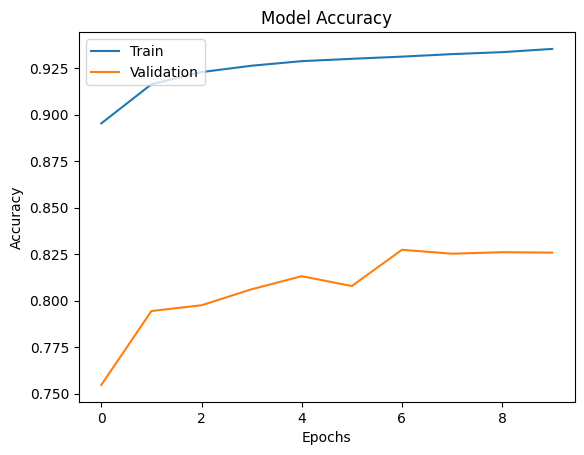

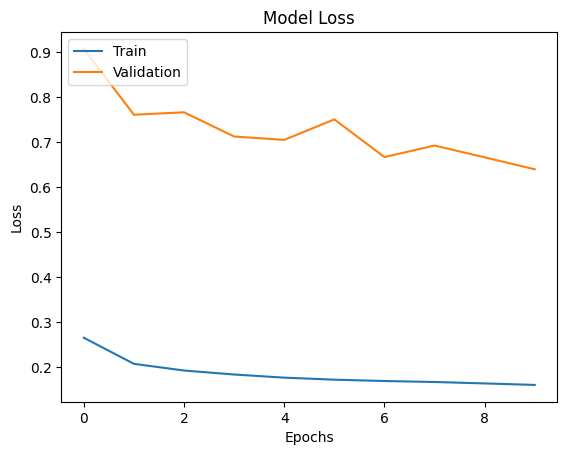

In [47]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()